## Notas de aula de Mecânica Quântica <br> Autor: Jonas Maziero

Link para o vídeo da aula sobre esse tópico: https://youtu.be/SIN6MA87fPY.

In [1]:
%run init.ipynb

# Degrau de potencial
Por simplicidade, e sem perda de generalidade, para o degrau de potencial, podemos escrever a função energia potencial como:
\begin{cases}
U(x<0)=0, \\
U(x>0)=U_{0}=\text{constante}.
\end{cases}
Como esse potencial é independente do tempo, usaremos a equação de Schrödinger independente do tempo,
\begin{equation}
-\frac{\hbar^{2}}{2m}\nabla_{\vec{r}}\psi(x,y,z)+U(x)\psi(x,y,z)=E\psi(x,y,z),
\end{equation}
e como estamos considerando uma aproximação na qual o quanton está restrito a se mover somente na direção x, aplicaremos a eq. de Schrödinger unidimensional (EqS1D):
\begin{equation}
-\frac{\hbar^{2}}{2m}\partial_{xx}\Xi(x)+U(x)\Xi(x)=E\Xi(x).
\end{equation}

À _esquerda da origem_, $U(x<0)=0$ e
\begin{align}
& -\frac{\hbar^{2}}{2m}\partial_{xx}\Xi_{e}(x)+0=E\Xi_{e}(x) \therefore \partial_{xx}\Xi_{e}(x) = -\frac{2mE}{\hbar^{2}}\Xi_{e}(x) \\ 
&\therefore \partial_{xx}\Xi_{e}(x) +k_{e}^{2}\Xi_{e}(x)=0,
\end{align}
com
\begin{equation}
k_{e}:=\frac{\sqrt{2mE}}{\hbar}.
\end{equation}
Vimos que as funções 
\begin{equation}
e^{i(k_{e}x-\omega t)}=e^{ik_{e}x}e^{-i\omega t} \text{ e } e^{i(-k_{e}x-\omega t)}=e^{-ik_{e}x}e^{-i\omega t}
\end{equation}
satisfazem a eq. de Schrödinger acima e que descrevem quantons livres se movimentando para a direita e para esquerda, respectivamente, com velocidade $\omega/k_{e}$. Assim, podemos escrever a forma geral da função de onda como uma combinação linear das ondas harmônicas acima:
\begin{equation}
\Xi_{e}(x<0) = c_{ed}e^{ik_{e}x}+c_{ee}e^{-ik_{e}x},
\end{equation}
com $c_{ed},c_{ee}\in\mathbb{C}$ constantes. Note que este é o perfil espacial da função de onda, a dependência temporal é dada por $e^{-i\omega t}$.

OBS. Abaixo está um exemplo do uso do IPython para resolução de eqs. diferenciais.

In [2]:
k, x = symbols('k x', Real=True); Xi = Function('Xi'); dsolve(Derivative(Xi(x),x,x) + k**2*Xi(x), Xi(x))

À _direita da origem_, $U(x>0)=U_{0}$ e
\begin{align}
&-\frac{\hbar^{2}}{2m}\partial_{xx}\Xi_{d}(x)+U_{0}\Xi_{d}(x)=E\Xi_{d}(x)\therefore \partial_{xx}\Xi_{d}(x) + \frac{2m(E-U_{0})}{\hbar^{2}}\Xi_{d}(x)=0 \\
& \therefore \partial_{xx}\Xi_{d}(x) + k_{d}^{2}\Xi_{d}(x)=0,
\end{align}
com
\begin{equation}
k_{d} = \frac{\sqrt{2m(E-U_{0})}}{\hbar}.
\end{equation}
Essa eq. diferencial tem a mesma forma da eq. diferencial para $x<0$, e assim
\begin{equation}
\Xi_{d}(x>0) = c_{dd}e^{ik_{d}x}+c_{de}e^{-ik_{d}x}.
\end{equation}

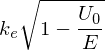

In [12]:
def kd(E,U0,ke):
    return sqrt(1-U0/E)*ke
U0, E = symbols('U_0 E', Real=True); kd(E,U0,ke)

Seguindo, vamos considerar o quanton movendo-se inicialmente da esquerda para a direita e vamos separar a análise em dois casos: $E>U_{0}$ e $E<U_{0}$:
## $E>U_{0}$:
Nesse caso, como $c_{de}e^{i(-k_{d}x-\omega t)}$ representa o quanton movendo-se para a esquerda, e não há motivo para que isso ocorra (depois que passou por $x=0$ não há força nenhuma que possa mudar o movimento), impomos
\begin{equation}
c_{de} := 0.
\end{equation}
Seguindo, usamos a continuidade da função de onda
\begin{equation}
\Xi_{e}(0)=\Xi_{d}(0) \therefore c_{ed}+c_{ee}=c_{dd}
\end{equation}
e da derivada primeira da função de onda
\begin{align}
& \partial_{x}\Xi_{e} = ik_{e}\left(c_{ed}e^{ik_{e}x}-c_{ee}e^{-ik_{e}x}\right) \text{, } \partial_{x}\Xi_{d} = ik_{d}c_{dd}e^{-ik_{d}x}, \\
& \partial_{x}\Xi_{e}(x=0) = \partial_{x}\Xi_{d}(x=0) \therefore ik_{e}(c_{ed}-c_{ee})=ik_{d}c_{dd}.
\end{align}

OBS. Abaixo está um exemplo do uso do IPython para resolução de sistemas de eqs. lineares.

In [ ]:
ced, cee, ke, cdd, kd = symbols('c_{ed} c_{ee} k_{e} c_{dd} k_{d}', Real=True)
solve([ced + cee - cdd, ke*(ced-cee)-kd*cdd], [cee, cdd])

In [ ]:
def cdd(E,U0,ke,ced):
    return ((2*ke)/(ke+kd(E,U0,ke)))*ced
def cee(E,U0,ke,ced):
    return ((ke-kd(E,U0,ke))/(ke+kd(E,U0,ke)))*ced
def Xie(E,U0,ke,ced,x):
    return ced*(cos(ke*x)+1j*sin(ke*x))+cee(E,U0,ke,ced)*(cos(ke*x)-1j*sin(ke*x))
def Xid(E,U0,ke,ced,x):
    return cdd(E,U0,ke,ced)*(cos(kd(E,U0,ke)*x)+1j*sin(kd(E,U0,ke)*x))
#cdd(E,U0,ke,ced), cee(E,U0,ke,ced), Xie(E,U0,ke,ced,x), Xid(E,U0,ke,ced,x)
#Xid(E,U0,ke,ced,x).as_real_imag()

Lembrando, $|\Xi(x)|^{2}dx$ é a probabilidade de, em uma medida da posição do quanton, encontrá-lo no intervalo infinitesimal $dx$ em torno da posição $x$. Se um feixe de comprimento $L$ com um total de
\begin{equation}
N=\int_{0}^{L}|\Xi(x)|^{2}dx
\end{equation}
quantons dirige-se em direção ao degrau de potencial com velocidade $dx/dt=\omega/k_{e}$, a densidade de probabilidade
\begin{equation}
dN = \frac{|\Xi(x)|^{2}dx}{dx} = |\Xi(x)|^{2}
\end{equation}
é igual à densidade de quantons, ou ao número de quantons por unidade de tempo, incidindo no degrau de potencial. Como inicialmente $c_{ed}e^{i(k_{e}x-\omega t)}$ é a função de onda que representa o quanton movendo-se para a direita, 
\begin{equation}
|c_{ed}|^{2}=dN.
\end{equation}
Por isso, vamos escrever os outros coeficientes em termos de $c_{ed}$:
\begin{equation}
c_{dd} = \frac{2k_{e}}{k_{e}+k_{d}}c_{ed} \text{ e } c_{ee} = \frac{k_{e}-k_{d}}{k_{e}+k_{d}}c_{ed}.
\end{equation}

O _coeficiente de reflexão_ é definido como a razão entre a taxa de quantons refletidos no degrau de potencial, $|c_{ee}|^{2}$, e a taxa de quantons incidindo no degrau de potencial, $|c_{ed}|^{2}$:
\begin{equation}
R := \frac{|c_{ee}|^{2}}{|c_{ed}|^{2}} = \frac{(k_{e}-k_{d})^{2}}{(k_{e}+k_{d})^{2}} = \frac{\left(\sqrt{E}-\sqrt{E-U_{0}}\right)^{2}}{\left(\sqrt{E}+\sqrt{E-U_{0}}\right)^{2}} = \frac{\left(\sqrt{\frac{E}{U_{0}}}-\sqrt{\frac{E}{U_{0}}-1}\right)^{2}}{\left(\sqrt{\frac{E}{U_{0}}}+\sqrt{\frac{E}{U_{0}}-1}\right)^{2}}.
\end{equation}
OBS. Começamos pelo coeficiente de relflexão pois os quantons dos feixes incidente e refletido possuem a mesma velocidade.

O _coefiente de transmissão_, que é a razão entre a taxa de quantons transmitidos através do degrau de potencial e a taxa de quantons incidindo no degrau de potencial, pode ser obtido assumindo que o número de quantons é conservado:
\begin{align}
& R+T:=1, \\
T & = 1-R = 1-\frac{(k_{e}-k_{d})^{2}}{(k_{e}+k_{d})^{2}} = \frac{4k_{e}k_{d}}{(k_{e}+k_{d})^{2}} \left(\equiv \frac{k_{e}}{k_{d}}\frac{|c_{dd}|^{2}}{|c_{ed}|^{2}} \equiv \frac{\omega/k_{d}}{\omega/k_{e}}\frac{|c_{dd}|^{2}}{|c_{ed}|^{2}} \ne \frac{|c_{dd}|^{2}}{|c_{ed}|^{2}}\right) \\
&  = \frac{4\sqrt{E(E-U_{0})}}{(\sqrt{E}+\sqrt{E-U_{0}})^{2}} = \frac{4\sqrt{\frac{E}{U_{0}}\left(\frac{E}{U_{0}}-1\right)}}{\left(\sqrt{\frac{E}{U_{0}}}+\sqrt{\frac{E}{U_{0}}-1}\right)^{2}}.
\end{align}

OBS. Em contraste com o caso clássico, para $E>U_{0}$ temos $R>0\therefore T<1$. Ou seja, mesmo tendo energia maior que a barreira de potencial, parte dos quantons é refletida e acaba movimentando-se para a esquerda da barreira de potencial.

Abaixo estão mostrados graficamente $R$ e $T$. Vemos que a probabilidade de uma partícula ser refletida diminui rapidamente com o aumento da energia (na sequência verificamos que $R=T$ para $E\approx 1.03U_{0}$).

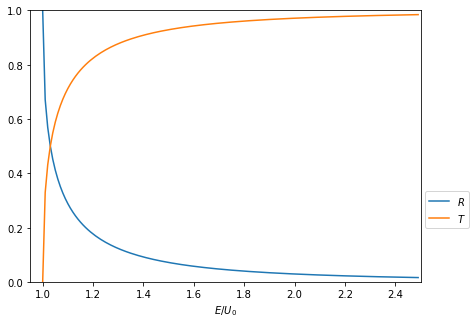

In [4]:
fig = plt.figure(figsize=(7,5)); x = np.arange(1,2.5,0.01)
R = ((np.sqrt(x)-np.sqrt(x-1))**2)/((np.sqrt(x)+np.sqrt(x-1))**2); T = 1-R
plt.plot(x,R); plt.plot(x,T); plt.xlim(0.95,2.5); plt.ylim(0,1); plt.xlabel(r'$E/U_{0}$')
plt.legend((r'$R$',r'$T$'),loc=(1.01,0.2))
plt.show()

Vamos obter a relação entre $E$ e $U_{0}$ que nos fornece $R=T$:
\begin{align}
& R=T \therefore 4\sqrt{E(E-U_{0})}=\left(\sqrt{E}-\sqrt{E-U_{0}}\right)^{2} = E - 2\sqrt{E}\sqrt{E-U_{0}}+E-U_{0} \\
& \therefore 6\sqrt{E(E-U_{0})}=2E-U_{0} \therefore 36E(E-U_{0})=4E^{2}-4U_{0}E+U_{0}^{2} \\
& \therefore 36E^{2}-4E^{2}-36U_{0}E+4U_{0}E-U_{0}^{2}=0 \therefore 32E^{2}-32U_{0}E-U_{0}^{2}=0 \\
& \therefore E = \frac{32U_{0}\pm\sqrt{32^{2}U_{0}^{2}-(4)(32)(-U_{0}^{2})}}{(2)(32)} = U_{0}\left(\frac{1}{2}\pm\frac{\sqrt{(36)(32)}}{(2)(32)}\right) \\
& E = U_{0}\left(\frac{1}{2}\pm\frac{3\sqrt{2}}{8}\right) \approx 1,03U_{0}.
\end{align}
Acima, como $E>U_{0}$, escolhemos a raíz positiva.

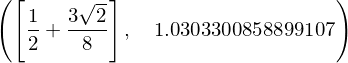

In [5]:
x = symbols('x'); solve(2*x-6*sqrt(x*(x-1))-1,x), (1/2)+(3*math.sqrt(2))/8

OBS. Como estamos fazendo uma descrição aproximada do quanton usando ondas harmônicas, o comprimento de onda de de Broglie:
\begin{align}
& \lambda_{e}=\frac{h}{p_{e}}=\frac{h}{\hbar k_{e}} = \frac{2\pi}{\sqrt{2mE}}\text{, } \lambda_{d}=\frac{h}{p_{d}}=\frac{h}{\hbar k_{d}} = \frac{2\pi}{\sqrt{2m(E-U_{0})}}, \\
& \frac{\lambda_{d}}{\lambda_{e}} = \sqrt{\frac{E}{E-U_{0}}} = \sqrt{\frac{E/U_{0}}{E/U_{0}-1}} >1.
\end{align}
Veja a figura abaixo. Para fazer essa figura assumimos que $c_{ed}\in\mathbb{R}\therefore c_{ee},c_{dd}\in\mathbb{R}$. Assim, usando que para quaisquer dois números complexos $z,w\in\mathbb{C}$ temos que
\begin{cases}
\Re(z+w)=\Re(z)+\Re(w),\\
\Re(zw)=\Re(z)\Re(w)-\Im(z)\Im(w),\\
\Re(e^{\pm i\theta}) = \Re(\cos(\theta)\pm i\sin(\theta))=\cos(\theta),\\
\Im(e^{\pm i\theta}) = \pm\sin(\theta),
\end{cases}
obteremos
\begin{cases}
\Re\left(\Xi_{e}(x<0)\right) = c_{ed}\Re\left(e^{ik_{e}x}\right)+c_{ee}\Re\left(e^{-ik_{e}x}\right) = (c_{ed}+c_{ee})\cos(k_{e}x), \\
\Re\left(\Xi_{d}(x>0)\right) = c_{dd}\Re\left(e^{ik_{d}x}\right) = c_{dd}\cos(k_{d}x).
\end{cases}

In [6]:
def E_gt_U0(E):
    fig = plt.figure(figsize=(13,5)); U0 = 1; ke = 1.0; ced = 1.0
    kd = math.sqrt(1-U0/E)*ke; cee = ((ke-kd)/(ke+kd))*ced; cdd = ((2*ke)/(ke+kd))*ced
    N = 500; xmin = -10*math.pi; xmax = -xmin; dx = (xmax-xmin)/N; x = np.zeros(N); y = np.zeros(N)
    for j in range(0,N):
        x[j] = xmin + j*dx
        if x[j] < 0:
            y[j] = (ced+cee)*math.cos(ke*x[j])
        else:
            y[j] = cdd*math.cos(kd*x[j])
    plt.annotate(r'$E/U_{0}=$'+str(E)[:5], xy=(xmax-8,1.8), xytext=(xmax-8,1.8), fontsize=12)
    plt.plot(x,y); plt.xlabel('x',fontsize=10); plt.ylabel(r'$\Re(\Xi)$',fontsize=15)
    plt.xlim(xmin,xmax); plt.ylim(-2*ced,2*ced); plt.show()
interactive(E_gt_U0, E=(1+10**-3,2,0.1))

interactive(children=(FloatSlider(value=1.4009999999999998, description='E', max=2.0, min=1.001), Output()), _…

In [7]:
def dp_E_gt_U0(E):
    fig = plt.figure(figsize=(13,5)); U0 = 1; ke = 1.0; ced = 1.0
    kd = math.sqrt(1-U0/E)*ke; cee = ((ke-kd)/(ke+kd))*ced; cdd = ((2*ke)/(ke+kd))*ced
    N = 500; xmin = -10*math.pi; xmax = -xmin; dx = (xmax-xmin)/N; x = np.zeros(N); y = np.zeros(N)
    for j in range(0,N):
        x[j] = xmin + j*dx
        if x[j] < 0:
            y[j] = (ced+cee)*math.cos(ke*x[j])
        else:
            y[j] = cdd*math.cos(kd*x[j])
    plt.annotate(r'$E/U_{0}=$'+str(E)[:5], xy=(xmax-8,1.8), xytext=(xmax-8,1.8), fontsize=12)
    plt.plot(x,y); plt.xlabel('x',fontsize=10); plt.ylabel(r'$\Re(\Xi)$',fontsize=15)
    plt.xlim(xmin,xmax); plt.ylim(-2*ced,2*ced); plt.show()
interactive(E_gt_U0, E=(1+10**-3,2,0.1))

interactive(children=(FloatSlider(value=1.4009999999999998, description='E', max=2.0, min=1.001), Output()), _…

## $E<U_{0}$:
Nesse caso temos $k_{d}=i\tilde{k}_{d}$ com
\begin{equation}
\tilde{k}_{d}=\sqrt{2m(U_{0}-E)}/\hbar.
\end{equation}
Assim
\begin{align}
\tilde{\Xi}_{d}(x>0) & = \tilde{c}_{dd}e^{ii\tilde{k}_{d}x}+\tilde{c}_{de}e^{-ii\tilde{k}_{d}x} = \tilde{c}_{dd}e^{-\tilde{k}_{d}x}+\tilde{c}_{de}e^{\tilde{k}_{d}x} \\ 
& := \tilde{c}_{dd}e^{-\tilde{k}_{d}x},
\end{align}
em que fizemos
\begin{equation}
\tilde{c}_{de}:=0
\end{equation}
pois caso contrário a função de onda iria para infinito quando $x\rightarrow\infty$. Também teremos que
\begin{equation}
\tilde{\Xi}_{e}(x<0)=\tilde{c}_{ed}e^{ik_{e}x}+\tilde{c}_{ee}e^{-ik_{e}x}.
\end{equation}

Para obter os coeficientes, em termos de $\tilde{c}_{ed}\equiv c_{ed}$, vamos impor novamente a continuidade da função de onda e de sua derivada primeira:
\begin{align}
& \tilde{\Xi}_{e}(x=0) = \tilde{\Xi}_{d}(x=0) \therefore \tilde{c}_{ed}+\tilde{c}_{ee}=\tilde{c}_{dd}, \\
& \partial_{x}\tilde{\Xi}_{e}(x=0) = \partial_{x}\tilde{\Xi}_{d}(x=0) \therefore ik_{e}\left(\tilde{c}_{ed}-\tilde{c}_{ee}\right) = -\tilde{k}_{d}\tilde{c}_{dd}.
\end{align}
Como mostrado abaixo,
\begin{equation}
\tilde{c}_{ee}=\frac{ik_{e}+\tilde{k}_{d}}{ik_{e}-\tilde{k}_{d}}\tilde{c}_{ed} \text{ e } \tilde{c}_{dd} = \frac{2ik_{e}}{ik_{e}-\tilde{k}_{d}}\tilde{c}_{ed}.
\end{equation}

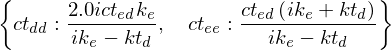

In [8]:
cted, ctee, ke, ctdd, ktd = symbols('ct_{ed} ct_{ee} k_{e} ct_{dd} kt_{d}')
solve([cted + ctee - ctdd, 1j*ke*(cted-ctee)+ktd*ctdd], [ctee, ctdd])

Abaixo está mostrada graficamente a parte real da função de onda para $E<U_{0}$. Para fazer esses gráficos é útil reescrever $\tilde{\Xi}_{e}$ como
\begin{equation}
\tilde{\Xi}_{e}(x<0) = \tilde{c}_{ed}e^{ik_{e}x} + \frac{ik_{e}+\tilde{k}_{d}}{ik_{e}-\tilde{k}_{d}}\tilde{c}_{ed}e^{-ik_{e}x} = \tilde{c}_{ed}\left(e^{ik_{e}x} + \frac{k_{e}^{2}-\tilde{k}_{d}^{2}-2ik_{e}\tilde{k}_{d}}{k_{e}^{2}+\tilde{k}_{d}^{2}}e^{-ik_{e}x}\right).
\end{equation}
Usando $\tilde{c}_{ed}\in\mathbb{R}$, teremos
\begin{align}
\Re(\tilde{\Xi}_{e}(x<0)) & = \tilde{c}_{ed}\left(\Re\left(e^{ik_{e}x}\right) + \Re\left(\frac{k_{e}^{2}-\tilde{k}_{d}^{2}-2ik_{e}\tilde{k}_{d}}{k_{e}^{2}+\tilde{k}_{d}^{2}}e^{-ik_{e}x}\right)\right) \\
& = \tilde{c}_{ed}\left(\cos(k_{e}x) + \Re\left(\frac{k_{e}^{2}-\tilde{k}_{d}^{2}-2ik_{e}\tilde{k}_{d}}{k_{e}^{2}+\tilde{k}_{d}^{2}}\right)\Re\left(e^{-ik_{e}x}\right) - \Im\left(\frac{k_{e}^{2}-\tilde{k}_{d}^{2}-2ik_{e}\tilde{k}_{d}}{k_{e}^{2}+\tilde{k}_{d}^{2}}\right)\Im\left(e^{-ik_{e}x}\right) \right) \\
& = \tilde{c}_{ed}\left(\cos(k_{e}x) + \frac{k_{e}^{2}-\tilde{k}_{d}^{2}}{k_{e}^{2}+\tilde{k}_{d}^{2}}\cos(k_{e}x) - \frac{2k_{e}\tilde{k}_{d}}{k_{e}^{2}+\tilde{k}_{d}^{2}}\sin(k_{e}x) \right) \\
& = \tilde{c}_{ed}\left(\frac{2k_{e}^{2}}{k_{e}^{2}+\tilde{k}_{d}^{2}}\cos(k_{e}x) - \frac{2k_{e}\tilde{k}_{d}}{k_{e}^{2}+\tilde{k}_{d}^{2}}\sin(k_{e}x) \right).
\end{align}
De
\begin{equation}
\tilde{\Xi}_{d}(x>0) = \tilde{c}_{dd}e^{-\tilde{k}_{d}x} = \frac{2ik_{e}}{ik_{e}-\tilde{k}_{d}}\tilde{c}_{ed}e^{-\tilde{k}_{d}x} = \frac{2k_{e}^{2}-2ik_{e}\tilde{k}_{d}}{k_{e}^{2}+\tilde{k}_{d}^{2}}\tilde{c}_{ed}e^{-\tilde{k}_{d}x}
\end{equation}
obtemos
\begin{equation}
\Re\left(\tilde{\Xi}_{d}(x>0)\right) = \frac{2k_{e}^{2}}{k_{e}^{2}+\tilde{k}_{d}^{2}}\tilde{c}_{ed}e^{-\tilde{k}_{d}x}.
\end{equation}
Também usaremos
\begin{equation}
\frac{\tilde{k}_{d}}{k_{e}} = \frac{\sqrt{2m(U_{0}-E)}/\hbar}{\sqrt{2mE}} = \sqrt{\frac{U_{0}}{E}-1}.
\end{equation}

In [9]:
def E_lt_U0(E):
    fig = plt.figure(figsize=(13,5)); U0 = 1; ke = 1.0; ced = 1.0; kd = math.sqrt(U0/E-1)*ke
    N = 1000; xmin = -10*math.pi; xmax = -xmin; dx = (xmax-xmin)/N; x = np.zeros(N); y = np.zeros(N)
    for j in range(0,N):
        x[j] = xmin + j*dx
        if x[j] < 0:
            y[j] = ced*(((2*ke**2)/(ke**2+kd**2))*math.cos(kd*x[j]) - ((2*ke*kd)/(ke**2+kd**2))*math.sin(kd*x[j]))
        else:
            y[j] = ced*((2*ke**2)/(ke**2+kd**2))*math.exp(-kd*x[j])
    plt.annotate(r'$E/U_{0}=$'+str(E)[:5], xy=(xmax-8,1.8), xytext=(xmax-8,1.8), fontsize=12)
    plt.plot(x,y); plt.xlabel('x',fontsize=10); plt.ylabel(r'$\Re(\Xi)$',fontsize=15)
    plt.xlim(xmin,xmax); plt.ylim(-2*ced,2*ced); plt.show()
interactive(E_lt_U0, E=(0+10**-3,1-10**-3,0.01))

interactive(children=(FloatSlider(value=0.491, description='E', max=0.999, min=0.001, step=0.01), Output()), _…

O coeficiente de reflexão é então dado por
\begin{align}
R & = \frac{|\tilde{c}_{ee}|^{2}}{|\tilde{c}_{ed}|^{2}} = \left|\frac{ik_{e}+\tilde{k}_{d}}{ik_{e}-\tilde{k}_{d}}\right|^{2} = \left|\frac{(ik_{e}+\tilde{k}_{d})(-ik_{e}+\tilde{k}_{d})}{(ik_{e}-\tilde{k}_{d})(-ik_{e}-\tilde{k}_{d})}\right|^{2} = \frac{k_{e}^{2}+\tilde{k}_{d}^{2}}{k_{e}^{2}+\tilde{k}_{d}^{2}} \\
& = 1.
\end{align}
Portanto o coeficiente de trasmissão é
\begin{equation}
T = 1 - R = 0.
\end{equation}
Por conseguinte, se a energia inicial do quanton é menor que a altura da barreira de potencial, $E<U_{0}$, todos os quantons são refletidos e acabam movendo-se para a esquerda, como se espera classicamente.

No entando, como a função de onda $\tilde{\Xi}_{d}$ é não nula mesmo para $x>0$, ela decai exponencialmente com $x$, o quanton parece penetrar em uma _região classicamente proibida_, pois classicamente
\begin{equation}
E=\frac{p^{2}}{2m}+U < U \therefore p^{2}<0 \therefore p\in\mathbb{C}.
\end{equation}
Lembrando, a probabilidade de encontrarmos o quanton em torno de um certo $x>0$ é 
\begin{equation}
|\tilde{\Xi}(x>0)|^{2}dx=|\tilde{c}_{dd}|^{2}e^{-2\tilde{k}_{d}x}.
\end{equation}
Essa probabilidade cai para $\approx 0,059$ do valor em $x=0$ para uma distância de penetração na região classicamente proibida:
\begin{equation}
x_{p} = \frac{\sqrt{2}}{\tilde{k}_{d}} = \frac{\hbar}{\sqrt{m(U_{0}-E)}}.
\end{equation}

In [10]:
exp(-2*sqrt(2.))

Vamos calcular $x_{p}$ para uma _partícula clássica_ de massa $m=1\text{ }\mu\text{g}=10^{-9}\text{ kg}$. Usando $U_{0}=1\text{ J}$ e $E=0.99U_{0}$. Teremos assim que
\begin{equation}
x_{p}\approx 3,3\mathrm{x}10^{-29} m,
\end{equation}
que é muito pequeno para ser mensurável. Bom, por isso não vemos esse tipo de fenômeno no contexto clássico-macroscópico. No entanto, esse efeito tem aplicações práticas muito importantes na tecnologia atual, como veremos na próxima aula, quando estudaremos barreiras de potencial.

In [11]:
def xp(m,U0,E):
    return hb/sqrt(m*(U0-E))
xp(10**-9,1,0.99)

---
# Exercícios

1. Verifique que, para $U=U_{0}$ constante, nem $\xi(x,t)=A\sin(kx-\omega t)$ nem $\sigma(x,t)=A\cos(kx-\omega t)$, com $A$ constante, satisfaz a EqS:
\begin{equation}
-\frac{\hbar^{2}}{2m}\partial_{xx}\psi(x,t)+U_{0}\psi(x,t)=i\hbar\partial_{t}\psi(x,t).
\end{equation}
Dica. Use o fato que $a\sin\phi+b\cos\phi=0\forall\phi$ se e somente se $a=b=0$.

1. Resolva o sistema de equações lineares
\begin{cases}
c_{ed}+c_{ee}=c_{dd}, \\
k_{e}(c_{ed}-c_{ee})=k_{d}c_{dd},
\end{cases}
para obter $c_{dd}=(2k_{e}/(k_{e}+k_{d}))c_{ed}$ e $c_{ee}=((k_{e}-k_{d})/(k_{e}+k_{d}))c_{ed}$.

1. Resolva o sistema de equações lineares
\begin{cases}
\tilde{c}_{ed}+\tilde{c}_{ee}=\tilde{c}_{dd}, \\
ik_{e}(\tilde{c}_{ed}-\tilde{c}_{ee})=-\tilde{k}_{d}\tilde{c}_{dd},
\end{cases}
para obter $\tilde{c}_{dd}=(2ik_{e}/(ik_{e}-\tilde{k}_{d}))\tilde{c}_{ed}$ e $\tilde{c}_{ee}=((ik_{e}+\tilde{k}_{d})/(ik_{e}-\tilde{k}_{d}))c_{ed}$.

1. Calcule e faça um gráfico da densidade de probabilidade $|\Xi(x)|^{2}$ nos dois casos $E>U_{0}$ e $E<U_{0}$. Considere $c_{ed},\tilde{c}_{ed}\in\mathbb{R}$ e use $k_{d}=k_{e}/2$.

1. Que fração de um feixe de prótons com energia cinética de $40\text{ MeV}$ que incidem em um degrau de potencial de $30\text{ MeV}$ é refletida? Que fração é transmitida? Quais seriam os valores de $R$ e $T$ se o feixe fosse constituído por elétrons?

1. Que fração de um feixe de quantons com energia cinética de $E_{c}=2U_{0}$, que incidem em um degrau de potencial de altura $U_{0}$, é refletida? Que fração é transmitida?

1. Usando as funções de onda derivadas em aula para os casos $E<U_{0}$ e $E>U_{0}$, obtenha $\Im(\Xi_{e}(x<0))$, $\Im(\Xi_{d}(x>0))$, $\Im(\tilde{\Xi}_{e}(x<0))$ e $\Im(\tilde{\Xi}_{d}(x>0)).$

1. Analogamente ao que fizemos para o caso do quanton movimentando-se inicialmente da esquerda para a direita, obtenha os coeficientes de transmissão e de reflexão para o caso do quanton movimentando-se inicialmente da direita para a esquerda na região $x>0$, para $E>U_{0}$.